# Regressão 01 - tarefa 01

## 1 Explorando a base de gorjetas


### 1.1 Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

In [1]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
# Importando os dados
df = sns.load_dataset("tips")
df['tip_pct'] = df['tip'] / (df['total_bill'] - df['tip'])
df['net_bill'] = df['total_bill'] - df['tip']

df_copy = df[df['tip_pct']<.5].copy()

df_copy.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
'''
Modelo de Regressão Linear Simples com a variável independente conta líquida
(net_bill) e variável dependente gorgeta (tip)
'''
reg_tip = smf.ols('tip ~ net_bill', data=df_copy).fit()
reg_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     137.1
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           2.41e-25
Time:                        12:55:07   Log-Likelihood:                -366.31
No. Observations:                 242   AIC:                             736.6
Df Residuals:                     240   BIC:                             743.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2219      0.166      7.339      0.000       0.894       1.550
net_bill       0.1044      0.009     11.708      0.000       0.087       0.122
==============================================================================
Omnibus:                       27.459   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.674
Skew:                           0.610   Prob(JB):                     9.92e-12
Kurtosis:                       4.881   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
'''
Para entender melhor o conceito do coeficiente de determinação, resolvi
escrever minha própria função de calculo do R²
'''
def calcula_r_quad(y_obs: list, y_pred: list) -> tuple:
  '''
  Função que recebe dois conjuntso de valores e calcula o R² entre eles. Retorna
  uma tupla com o R² e uma DataFrame com os valores.
  :param y_obs (list): Conjunto de valores observados
  :param y_pred (list): Conjunto de valores preditos
  :return r_quad (float): R²
  :return df_r2 (pd.DataFrame): DataFrame com os clculos
  '''
  df_r2 = pd.DataFrame()
  df_r2['y_obs'] = y_obs
  df_r2['sqt'] = (y_obs-np.mean(y_obs))**2
  df_r2['y_pred'] = y_pred
  df_r2['y-estima'] = y_obs-y_pred
  df_r2['sqe'] = df_r2['y-estima']**2
  r_quad = round(1 - (df_r2['sqe'].sum()/df_r2['sqt'].sum()), 3)
  return (r_quad, df_r2)

### 1.2 Reproduza também o gráfico de dispersão dessas duas variáveis.

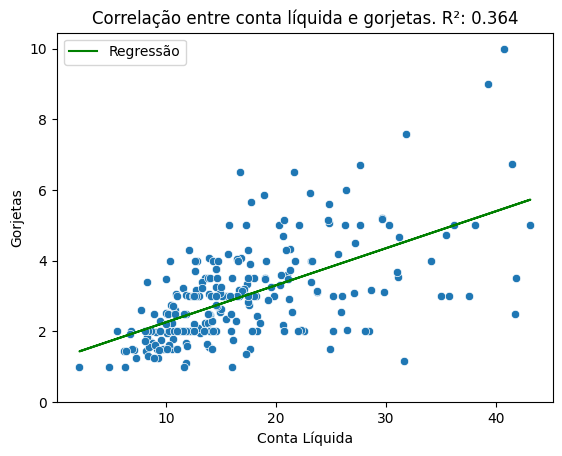

In [5]:
# Instanciando as variáveis com os dados
x_net_bill = df_copy['net_bill']
y_obs_tip = df_copy['tip']
y_pred_tip = reg_tip.fittedvalues

# Gráfico de dispersão
sns.scatterplot(y=y_obs_tip, x=x_net_bill)

# Plotando a linha da Regressão
plt.plot(x_net_bill, y_pred_tip, '-g', label='Regressão')

# Calculando o R²
r_square_tip = calcula_r_quad(y_pred=y_pred_tip, y_obs=y_obs_tip)[0]

# Opções estéticas do gráfico
plt.legend(loc="upper left")
plt.title(f"Correlação entre conta líquida e gorjetas. R²: {r_square_tip}")
plt.xlabel("Conta Líquida")
plt.ylim(bottom = 0)
plt.ylabel("Gorjetas")

plt.show()

### Conclusão

- A Regressão Linear Simples da variável independente `net_bill` para obter a variável depedente gorjeta `tip` apresentou um R² de 0,364.



---



## 2 Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [6]:
'''
Modelo de Regressão Linear Simples com a variável independente conta líquida
(net_bill) e variável dependente porcentagem da gorgeta (tip_pct)
'''
reg_tip_pct = smf.ols('tip_pct ~ net_bill', data=df_copy).fit()
reg_tip_pct.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     56.10
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           1.31e-12
Time:                        12:55:08   Log-Likelihood:                 331.48
No. Observations:                 242   AIC:                            -659.0
Df Residuals:                     240   BIC:                            -652.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2538      0.009     27.252      0.000       0.235       0.272
net_bill      -0.0037      0.000     -7.490      0.000      -0.005      -0.003
==============================================================================
Omnibus:                       25.646   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.523
Skew:                           0.764   Prob(JB):                     1.43e-07
Kurtosis:                       3.889   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

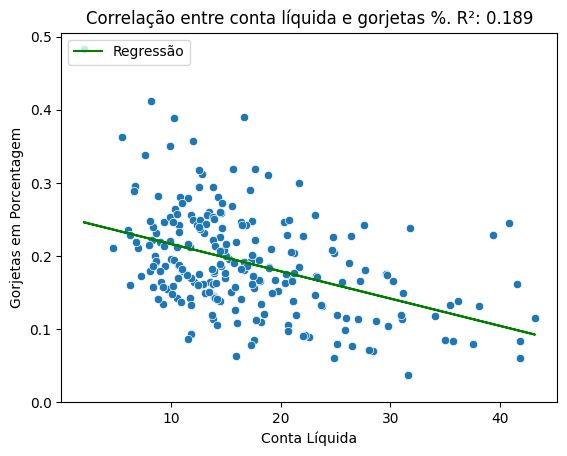

In [7]:
# Instanciando as variáveis com os dados
y_obs_tip_pct = df_copy['tip_pct']
y_pred_tip_pct = reg_tip_pct.fittedvalues

# Gráfico de dispersão
sns.scatterplot(y=y_obs_tip_pct, x=x_net_bill)

# Plotando a linha da Regressão
plt.plot(x_net_bill, y_pred_tip_pct, '-g', label='Regressão')

# Calculando o R²
r_square_tip_pct = calcula_r_quad(y_pred=y_pred_tip_pct, y_obs=y_obs_tip_pct)[0]

# Opções estéticas do gráfico
plt.legend(loc="upper left")
plt.title(f"Correlação entre conta líquida e gorjetas %. R²: {r_square_tip_pct}")
plt.xlabel("Conta Líquida")
plt.ylim(bottom = 0)
plt.ylabel("Gorjetas em Porcentagem")

plt.show()

### Conclusão

- A Regressão Linear Simples da variável independente `net_bill` para obter a variável dependente gorjeta em porcentagem `tip_pct`, apresentou um R² de 0,189.



---



## 3 Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

In [8]:
_, df_test = calcula_r_quad(y_pred=y_pred_tip, y_obs=y_obs_tip)

print("Regressão para Gorjeta")
sqe = df_test.sqe.sum()
print(f"Soma dos Quadrados dos Resíduos (SQE): {sqe:.3f}")

sqt = df_test.sqt.sum()
print(f"Soma Total dos Quadrados (SQT): {sqt:.3f}")

print(f"R²: {1 - (sqe / sqt):.3f}")

Regressão para Gorjeta
Soma dos Quadrados dos Resíduos (SQM): 292.483
Soma Total dos Quadrados (SQT): 459.538
R²: 0.364


In [9]:
_, df_test = calcula_r_quad(y_pred=y_pred_tip_pct, y_obs=y_obs_tip_pct)

print("Regressão para Gorjeta em Porcentagem")

sqe = df_test.sqe.sum()
print(f"Soma dos Quadrados dos Resíduos (SQE): {sqe:.3f}")

sqt = df_test.sqt.sum()
print(f"Soma Total dos Quadrados (SQT): {sqt:.3f}")

print(f"R²: {1 - (sqe / sqt):.3f}")

Regressão para Gorjeta em Porcentagem
Soma dos Quadrados dos Resíduos (SQM): 0.915
Soma Total dos Quadrados (SQT): 1.129
R²: 0.189


### Conclusão

- A observação dos gráficos mostra que as gorjetas seriam diretamente proporcionais as contas líquidas. Já a porcentagem das gorjetas é inversamente proporcionais a essas contas.

- A compração direta entre R²s pode ser feita, mas com ressalvas. Principalmente porque a variável independete nos dois modelos é diferente. As gorjetas e a sua porcentagem são correlacionadas, porém, distintas, como observado nos gráficos.

- O R² do modelo para as gorjetas tem um melhor ajuste, 0,364, quando comparado com o R² para as porcentagens das gorjetas, 0,189.



---



## 4 Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:

### 4.1 obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)

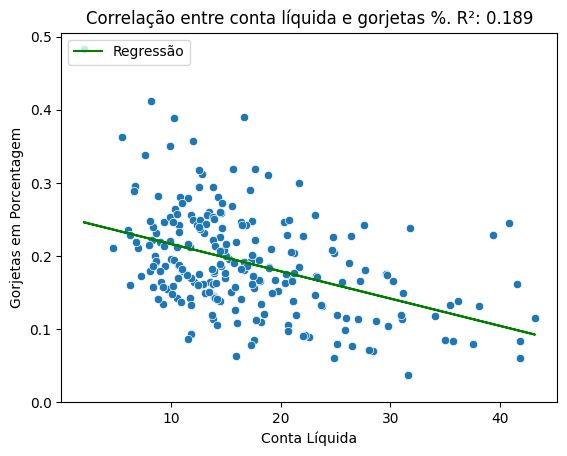

In [10]:
# Instanciando as variáveis com os dados
y_pred_tip_pct = reg_tip_pct.fittedvalues

# Gráfico de dispersão
sns.scatterplot(y=y_obs_tip_pct, x=x_net_bill)

# Plotando a linha da Regressão
plt.plot(x_net_bill, y_pred_tip_pct, '-g', label='Regressão')

# Calculando o R²
r_square_tip_pct = calcula_r_quad(y_pred=y_pred_tip_pct, y_obs=y_obs_tip_pct)[0]

# Opções estéticas do gráfico
plt.legend(loc="upper left")
plt.title(f"Correlação entre conta líquida e gorjetas %. R²: {r_square_tip_pct}")
plt.xlabel("Conta Líquida")
plt.ylim(bottom = 0)
plt.ylabel("Gorjetas em Porcentagem")

plt.show()

### 4.2 obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```

In [11]:
# Obtendo o valor predito para tip como tip_pct * net_bill
y_pred_tip_mult = df_copy['tip_pct'] * df_copy['net_bill']
y_pred_tip_mult[:4]

0    1.01
1    1.66
2    3.50
3    3.31
dtype: float64

### 4.3 calcule o $R^2$ do modelo para ```tip```

In [12]:
# Calculando o R²
r_square_tip_mult = calcula_r_quad(y_pred=y_pred_tip_mult, y_obs=y_obs_tip)[0]
print(f"Coeficiente de determinação entre conta líquida e gorjetas, multiplicação:\nR²: {r_square_tip_mult}")

Coeficiente de determinação entre conta líquida e gorjetas, multiplicação:
R²: 1.0


### 4.4 compare esse $R^2$ com o do item 1

In [13]:
# Calculando o R² iem 1
r_square_tip = calcula_r_quad(y_pred=y_pred_tip, y_obs=y_obs_tip)[0]
print(f"Coeficiente de determinação entre conta líquida e gorjetas, regressão\nR²: {r_square_tip}")

Coeficiente de determinação entre conta líquida e gorjetas, regressão
R²: 0.364


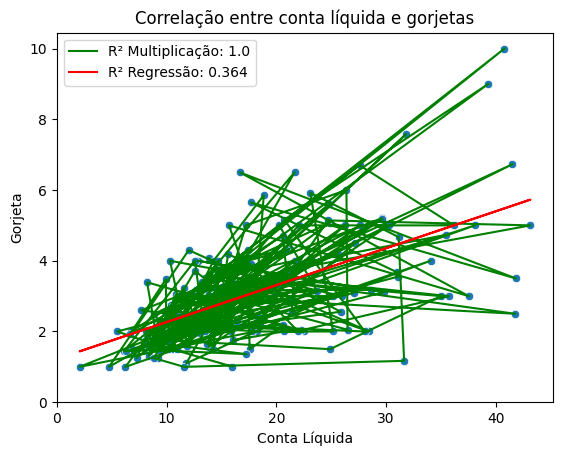

In [14]:
 # Gráfico de dispersão
sns.scatterplot(y=y_obs_tip, x=x_net_bill)

# Plotando a linha de Regressão
plt.plot(x_net_bill, y_pred_tip_mult, '-g', label=f'R² Multiplicação: {r_square_tip_mult}')
plt.plot(x_net_bill, y_pred_tip, '-r', label=f'R² Regressão: {r_square_tip}')

# Opções estéticas do gráfico
plt.title(f"Correlação entre conta líquida e gorjetas")
plt.legend(loc="upper left")
plt.xlim(left = 0)
plt.xlabel("Conta Líquida")
plt.ylim(bottom = 0)
plt.ylabel("Gorjeta")

plt.show()

### Conclusão

- A gorjeta `tip` é uma porcentagem da conta, portanto, quando multiplico a conta líquida `net_bill` pela porcentagem da gorgeta `tip_pct` eu obtenho a própria gorgeta `tip`. Assim, o modelo de multiplicação é "perfeito", com R² = 1, portanto sem resíduos, e passa por todos os pontos, como vemos no gráfico.
- Já o modelo que usou a conta líquida `net_bill` para obter a gorjeta `tip` teve um ajuste pior, com R² = 0,364. Aqui, o baixo coeficiente de determinação mostra que o modelo é mais útil, por ser mais generalizável.



---



# Análise extra

O R² pode ser usado para comparar modelos que apresentem os mesmo valores, como 10% da conta e 10% de uma distribuição linear com a amplitude da conta?<br>
Realizando isso com uma Regressão Linear Simples.

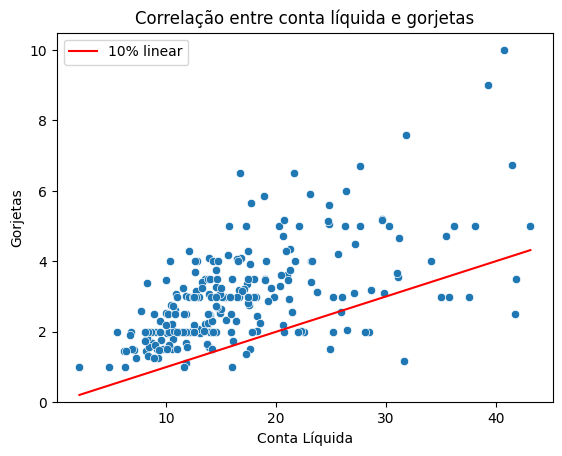

In [15]:
# Gráfico de dispersão
sns.scatterplot(y=y_obs_tip, x=x_net_bill)

# Instanciando as variáveis com os dados
x = np.linspace(df_copy['net_bill'].min() ,df_copy['net_bill'].max(),len(df_copy))
y = .1*x

# Plotando a linha dos 10% linear
plt.plot(x, y, '-r', label='10% linear')

# Opções estéticas do gráfico
plt.legend(loc="upper left")
plt.title("Correlação entre conta líquida e gorjetas")
plt.xlabel("Conta Líquida")
plt.ylim(bottom = 0)
plt.ylabel("Gorjetas")

plt.show()

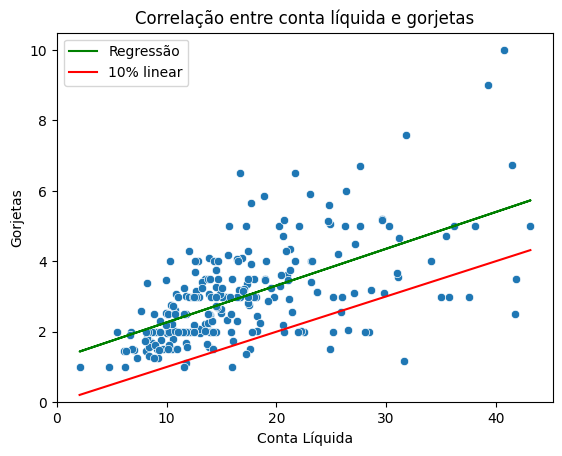

In [16]:
# Gráfico de dispersão
sns.scatterplot(y=y_obs_tip, x=x_net_bill)

# Instanciando as variáveis com os dados
reg = smf.ols('tip ~ net_bill', data = df_copy).fit()
y_pred = reg.predict(x_net_bill)

# Plotando a linha de Regressão
plt.plot(x_net_bill, y_pred, '-g', label='Regressão')

# Plotando a linha dos 10% linear
plt.plot(x, y, '-r', label='10% linear')

# Opções estéticas do gráfico
plt.legend(loc="upper left")
plt.title("Correlação entre conta líquida e gorjetas")
plt.xlim(left = 0)
plt.xlabel("Conta Líquida")
plt.ylim(bottom = 0)
plt.ylabel("Gorjetas")

plt.show()

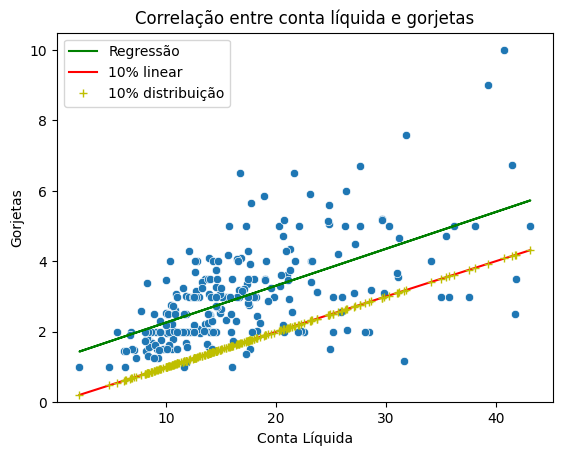

In [17]:
sns.scatterplot(y='tip', x='net_bill', data=df_copy)

# Instanciando as variáveis com os dados
y_dez = .1*x_net_bill

# Plotando a linha de Regressão
plt.plot(x_net_bill, y_pred, '-g', label='Regressão')

# Plotando a linha dos 10% linear
plt.plot(x, y, '-r', label='10% linear')

# Plotando a linha dos 10% distribuição
plt.plot(x_net_bill, y_dez, '+y', label='10% distribuição')

# Opções estéticas do gráfico
plt.legend(loc="upper left")
plt.title("Correlação entre conta líquida e gorjetas")
plt.xlabel("Conta Líquida")
plt.ylim(bottom = 0)
plt.ylabel("Gorjetas")

plt.show()

In [18]:
# Instanciando objeto com os valores de gorjeta observados
y_obs = df_copy['tip'].values
y_obs[:5]

array([1.01, 1.66, 3.5 , 3.31, 3.61])

In [19]:
_, df_test = calcula_r_quad(y_pred=y, y_obs=y_obs)

print("10% linear")
sqe = df_test.sqe.sum()
print(f"Soma dos Quadrados dos Resíduos: {sqe:.3f}")

sqt = df_test.sqt.sum()
print(f"Soma Total dos Quadrados: {sqt:.3f}")

print(f"R²: {1 - (sqe / sqt):.3f}")

10% linear
Soma dos Quadrados dos Resíduos: 956.969
Soma Total dos Quadrados: 459.538
R²: -1.082


In [20]:
_, df_test = calcula_r_quad(y_pred=y_dez, y_obs=y_obs)

print("10% distribuição")
sqe = df_test.sqe.sum()
print(f"Soma dos Quadrados dos Resíduos: {sqe:.3f}")

sqt = df_test.sqt.sum()
print(f"Soma Total dos Quadrados: {sqt:.3f}")

print(f"R²: {1 - (sqe / sqt):.3f}")

10% distribuição
Soma dos Quadrados dos Resíduos: 697.069
Soma Total dos Quadrados: 459.538
R²: -0.517


In [21]:
_, df_test = calcula_r_quad(y_pred=y_pred, y_obs=y_obs)

print("Regressão")
sqe = df_test.sqe.sum()
print(f"Soma dos Quadrados dos Resíduos: {sqe:.3f}")

sqt = df_test.sqt.sum()
print(f"Soma Total dos Quadrados: {sqt:.3f}")

print(f"R²: {1 - (sqe / sqt):.3f}")

Regressão
Soma dos Quadrados dos Resíduos: 291.146
Soma Total dos Quadrados: 459.538
R²: 0.366


### Conclusão

- O R² pode ser usado para comparar os modelos.
- Foram determinados 3 modelos:
 <br>-- O primeiro com 10% dos valores em uma distribuição linear com mínimo de 0 e máximo igual ao máximo da conta dos clientes.
 <br>-- Um segundo, com 10% do valor das contas.
 <br>-- E um terceiro modelo com uma Regressão Linear Simples.
 <br>
 <br>
- O primeiro moelo teve o pior desempenho, com um valor de R² de -1,082. Isso significa que a Soma dos Quadrados dos Resíduos (SQE) foi maior (956) do que a Soma Total dos Quadrados (SQT), de 459.
- Já o segundo modelo teve um melhor R² que o primeiro, -0,51, porém ainda negativo, com SQE de 697.
- O terceiro modelo, de Regressão Linear Simples, teve o melhor R², de 0,366, com SQE de 291.
<br>
<br>
É interessante observar que o R² não deveria ser negativo, porém, aqui, isso indica que usar apenas a média como modelo seria melhor do que os dois modelos de 10%.